# Linear Regression

* Packages

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch import optim
import numpy as np

* From the sklearn package, we import the function make_regression

In [22]:
from sklearn.datasets import make_regression

n_features = 1
n_samples = 150

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=18,
)

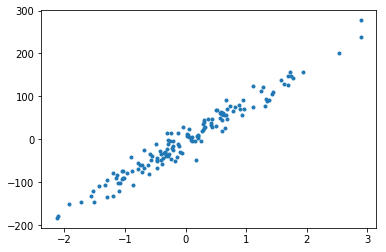

In [23]:
fix, ax = plt.subplots()
ax.plot(X, y, ".")

* Transform the numpy.ndarray to torch.Tensor and reshape the y tensor

In [26]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

* Model

In [24]:
class Net(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.h1 = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.h1(X) 

In [25]:
model = Net(n_features) 
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Loss : 6620.6
Loss : 459.8
Loss : 296.2
Loss : 291.8
Loss : 291.7
Loss : 291.7
Loss : 291.7
Loss : 291.7
Loss : 291.7
Loss : 291.7


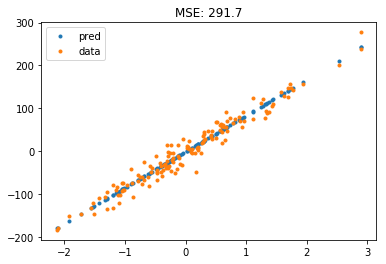

In [27]:
for i in range(1000):
    # Train step
    model.train()
    optimizer.zero_grad()

    y_ = model(X)

    loss = criterion(y_, y)
    loss.backward()
    optimizer.step()

    if i % 100 == 0 : 
        # Eval
        model.eval()
        with torch.no_grad():
            y_ = model(X)

        print(f'Loss : {loss.item():0.1f}')
        
# Visualization
with torch.no_grad():
    fig, ax = plt.subplots()
    ax.plot(X.numpy(), y_.detach().numpy(), ".", label="pred")
    ax.plot(X.numpy(), y.numpy(), ".", label="data")
    ax.set_title(f"MSE: {loss.item():0.1f}")
    ax.legend();